## Figure 12 (Journal of Climate submission; Molina et al.)

Fig.12. ONI for the CESM1 control (a) and sensitivity experiments (b-f). Red shading indicates ONI≥+0.5(El Niño conditions) and blue indicates ONI≤-0.5 (La Niña conditions). 100 years of the CESM1 control wereadded at the start of all time series for illustration of ONI prior to AMOC and PMOC modulations, delineated withthe solid black vertical lines. The dashed vertical lines show the approximate years when AMOC was collapsedfor the Global and Pacific experiments (b-e) and when PMOC was active for the Pacific Salt experiment (f).

**Figure by: Maria J. Molina, NCAR**

In [2]:
# imports 

import xarray as xr
import pandas as pd
import numpy as np
from climatico import enso
from climatico.util import weighted_mean
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import timedelta

In [3]:
from config import directory_figs, directory_data

In [4]:
# list of filenames to do this for
file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'

In [5]:
nino = enso.DefineNino(nino='nino34', lats='lat', lons='lon', cutoff=0.5, runningmean=3)

In [6]:
# extract first 100 years from control run for concatenating
ds = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds = ds.assign_coords(time=ds.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
first100_ssts = ds['SST']

In [7]:
# control run index computation
ds2 = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds2 = ds2.assign_coords(time=ds2.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds2 = ds2.isel(z_t=0)

# attach first 100 years
control_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                          ds2['SST'].sel(time=slice('0800-01-01 00:00:00', '1600-01-01 00:00:00'))], dim='time')
control_ssts['time'] = xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")

# rolling climo 
control_ssts_roll = nino.monthly_climo(control_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')

# compute nino index
control_nino, stdval = nino.compute_index(
                                  control_ssts, control_ssts_roll, 
                                  linear_detrend=False, lat_name='lat',
                                  output_std=True, input_std=None, custom_std=False, first_threshold=100, last_threshold=900)                               

# compute nino index (previously)
#control_nino, stdval = nino.compute_index(
#                                  control_ssts.groupby('time.month'), control_ssts.groupby('time.month').mean(), 
#                                  linear_detrend=False, lat_name='lat', 
#                                  output_std=True, input_std=None, custom_std=False, first_threshold=100, last_threshold=900)

# grab numpy array
control_nino = control_nino.values
control_stdval = stdval.values

In [8]:
# g02sv index computation
ds3 = xr.open_mfdataset(f'{directory_data}{file_g02sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds3 = ds3.assign_coords(time=ds3.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds3 = ds3.isel(z_t=0)

# attach first 100 years
g02sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        ds3['SST'].sel(time=slice('0001-01-01 00:00:00', '0801-01-01 00:00:00'))], dim='time')
g02sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")

# rolling climo 
g02sv_ssts_roll = nino.monthly_climo(g02sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')

# compute nino index
g02sv_nino = nino.compute_index(g02sv_ssts, g02sv_ssts_roll, 
                                  linear_detrend=False, lat_name='lat',
                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=900)

# compute nino index (previously)
#g02sv_nino = nino.compute_index(g02sv_ssts.groupby('time.month'), control_ssts.groupby('time.month').mean(), 
#                                  linear_detrend=False, lat_name='lat',    
#                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=900)

# grab numpy array
g02sv_nino = g02sv_nino.values

In [9]:
# g04sv index computation
ds4 = xr.open_mfdataset(f'{directory_data}{file_g04sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds4 = ds4.assign_coords(time=ds4.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds4 = ds4.isel(z_t=0)

# attach first 100 years
g04sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        ds4['SST'].sel(time=slice('0001-01-01 00:00:00', '0801-01-01 00:00:00'))], dim='time')
g04sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")

# rolling climo 
g04sv_ssts_roll = nino.monthly_climo(g04sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')

# compute nino index
g04sv_nino = nino.compute_index(g04sv_ssts, g04sv_ssts_roll, 
                                  linear_detrend=False, lat_name='lat',
                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=900)

# compute nino index (previously)
#g04sv_nino = nino.compute_index(g04sv_ssts.groupby('time.month'), control_ssts.groupby('time.month').mean(), 
#                                  linear_detrend=False, lat_name='lat',    
#                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=900)

# grab numpy arrays
g04sv_nino = g04sv_nino.values

In [10]:
# p02sv index computation
ds5 = xr.open_mfdataset(f'{directory_data}{file_p02sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds5 = ds5.assign_coords(time=ds5.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds5 = ds5.isel(z_t=0)

# attach first 100 years
p02sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        ds5['SST'].sel(time=slice('0001-01-01 00:00:00', '0801-01-01 00:00:00'))], dim='time')
p02sv_ssts['time'] = xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")

# rolling climo 
p02sv_ssts_roll = nino.monthly_climo(p02sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')

# compute nino index
p02sv_nino = nino.compute_index(p02sv_ssts, p02sv_ssts_roll, 
                                  linear_detrend=False, lat_name='lat',
                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=900)

# compute nino index (previously)
#p02sv_nino = nino.compute_index(p02sv_ssts.groupby('time.month'), control_ssts.groupby('time.month').mean(), 
#                                  linear_detrend=False, lat_name='lat',    
#                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=900)

# grab numpy arrays
p02sv_nino = p02sv_nino.values

In [11]:
# p04sv index computation
ds6 = xr.open_mfdataset(f'{directory_data}{file_p04sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds6 = ds6.assign_coords(time=ds6.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds6 = ds6.isel(z_t=0)

# attach first 100 years
p04sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        ds6['SST'].sel(time=slice('0001-01-01 00:00:00', '0801-01-01 00:00:00'))], dim='time')
p04sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")

# rolling climo 
p04sv_ssts_roll = nino.monthly_climo(p04sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')

# compute nino index
p04sv_nino = nino.compute_index(p04sv_ssts, p04sv_ssts_roll, 
                                  linear_detrend=False, lat_name='lat',
                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=900)

# compute nino index (previously)
#p04sv_nino = nino.compute_index(p04sv_ssts.groupby('time.month'), control_ssts.groupby('time.month').mean(), 
#                                  linear_detrend=False, lat_name='lat',    
#                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=900)

# grab numpy arrays
p04sv_nino = p04sv_nino.values

In [12]:
# psalt index computation
ds7 = xr.open_mfdataset(f'{directory_data}{file_psalt}',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds7 = ds7.assign_coords(time=ds7.coords['time'] - timedelta(days=17))
# reduce dims to time, lat, lon
ds7 = ds7.isel(z_t=0)

# psalt index computation
ds8 = xr.open_mfdataset(f'{directory_data}b2d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.030101-035012.nc',
                       combine='by_coords',
                       preprocess=nino.nino)
# fix time coord
ds8 = ds8.assign_coords(time=ds8.coords['time'] - timedelta(days=17))
ds8 = ds8.sel(time=slice('0301-01-01 00:00:00', '0351-01-01 00:00:00'))

# attach first 100 years
psalt_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')).drop('z_t'),
                        ds7['SST'].sel(time=slice('0001-01-01 00:00:00', '0301-01-01 00:00:00')).drop('z_t'),
                        ds8['SST']], dim='time')
psalt_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0450-12-31 00:00:00", freq="MS", calendar="noleap")

# rolling climo 
psalt_ssts_roll = nino.monthly_climo(psalt_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')

# compute nino index
psalt_nino = nino.compute_index(psalt_ssts, psalt_ssts_roll, 
                                  linear_detrend=False, lat_name='lat',
                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=450)

# compute nino index (previously)
#psalt_nino = nino.compute_index(psalt_ssts.groupby('time.month'), control_ssts.groupby('time.month').mean(), 
#                                  linear_detrend=False, lat_name='lat',    
#                                  output_std=False, input_std=control_stdval, custom_std=True, first_threshold=100, last_threshold=450)

# grab numpy arrays
psalt_nino = psalt_nino.values

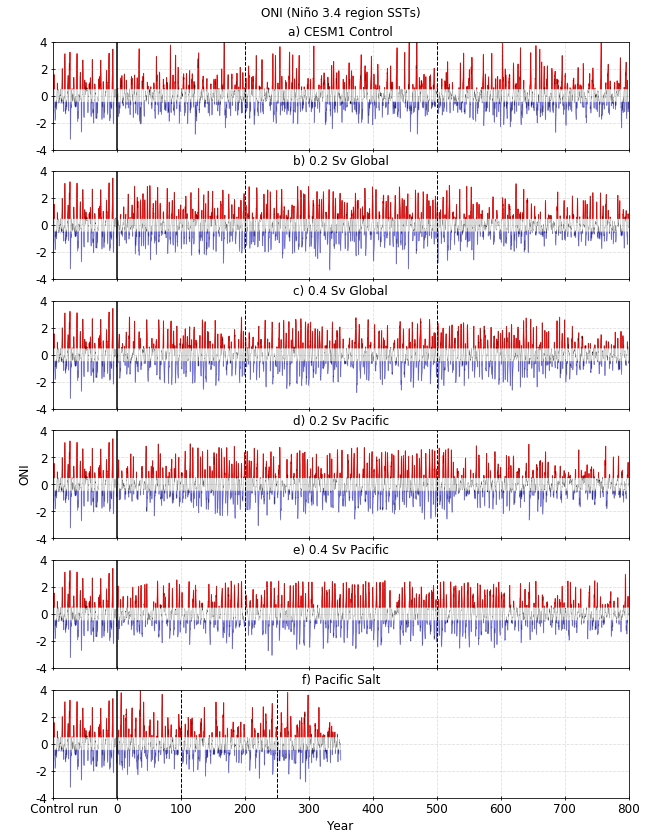

In [13]:
# -------------- create figure

fig = plt.figure(figsize=(8,12))

fig.suptitle(u'ONI (Niño 3.4 region SSTs)', x=0.5, y=0.915, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 1., 0.125])

ax1.set_title('a) CESM1 Control', fontsize=12)

ax1.plot(control_nino, c='k', lw=0.15)
ax1.fill_between(range(control_nino.shape[0]), np.where(control_nino>=nino.cutoff, control_nino, np.nan), nino.cutoff, color='r', alpha=0.8)
ax1.fill_between(range(control_nino.shape[0]), np.where(control_nino<=-nino.cutoff, control_nino, np.nan), -nino.cutoff, color='b', alpha=0.3)

ax1.margins(x=0)
ax1.set_xlim([0,10800])
ax1.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax1.grid(alpha=0.4, ls='--')

ax1.set_ylim([-4,4])
ax1.set_yticks([-4,-2,0,2,4])
ax1.set_yticklabels([-4,-2,0,2,4], fontsize=12)

ax1.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax1.axvline(1200, lw=1.5, c='k')
ax1.axvline(3600, lw=1., ls='--', c='k')
ax1.axvline(7200, lw=1., ls='--', c='k')

#custom_lines = [Line2D([0], [0], color='salmon', lw=4),
#                Line2D([0], [0], color='grey', lw=4)]
#ax1.legend(custom_lines, ['SSTs', 'Climatology'], fontsize=12, bbox_to_anchor=(1.01, 1.35), ncol=2)

# --------------

ax2 = plt.axes([0., 0.6, 1., 0.125])

ax2.set_title('b) 0.2 Sv Global', fontsize=12)

ax2.plot(g02sv_nino, c='k', lw=0.15)
ax2.fill_between(range(g02sv_nino.shape[0]), np.where(g02sv_nino>=nino.cutoff, g02sv_nino, np.nan), nino.cutoff, color='r', alpha=0.8)
ax2.fill_between(range(g02sv_nino.shape[0]), np.where(g02sv_nino<=-nino.cutoff, g02sv_nino, np.nan), -nino.cutoff, color='b', alpha=0.3)

ax2.margins(x=0)
ax2.set_xlim([0,10800])
ax2.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax2.grid(alpha=0.4, ls='--')

ax2.set_ylim([-4,4])
ax2.set_yticks([-4,-2,0,2,4])
ax2.set_yticklabels([-4,-2,0,2,4], fontsize=12)

ax2.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax2.axvline(1200, lw=1.5, c='k')
ax2.axvline(3600, lw=1., ls='--', c='k')
ax2.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax3 = plt.axes([0., 0.45, 1., 0.125])

ax3.set_title('c) 0.4 Sv Global', fontsize=12)

ax3.plot(g04sv_nino, c='k', lw=0.15)
ax3.fill_between(range(g04sv_nino.shape[0]), np.where(g04sv_nino>=nino.cutoff, g04sv_nino, np.nan), nino.cutoff, color='r', alpha=0.8)
ax3.fill_between(range(g04sv_nino.shape[0]), np.where(g04sv_nino<=-nino.cutoff, g04sv_nino, np.nan), -nino.cutoff, color='b', alpha=0.3)

ax3.margins(x=0)
ax3.set_xlim([0,10800])
ax3.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax3.grid(alpha=0.4, ls='--')

ax3.set_ylim([-4,4])
ax3.set_yticks([-4,-2,0,2,4])
ax3.set_yticklabels([-4,-2,0,2,4], fontsize=12)

ax3.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax3.axvline(1200, lw=1.5, c='k')
ax3.axvline(3600, lw=1., ls='--', c='k')
ax3.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax4 = plt.axes([0., 0.3, 1., 0.125])

ax4.set_title('d) 0.2 Sv Pacific', fontsize=12)

ax4.plot(p02sv_nino, c='k', lw=0.15)
ax4.fill_between(range(p02sv_nino.shape[0]), np.where(p02sv_nino>=nino.cutoff, p02sv_nino, np.nan), nino.cutoff, color='r', alpha=0.8)
ax4.fill_between(range(p02sv_nino.shape[0]), np.where(p02sv_nino<=-nino.cutoff, p02sv_nino, np.nan), -nino.cutoff, color='b', alpha=0.3)

ax4.margins(x=0)
ax4.set_xlim([0,10800])
ax4.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax4.grid(alpha=0.4, ls='--')

ax4.set_ylim([-4,4])
ax4.set_yticks([-4,-2,0,2,4])
ax4.set_yticklabels([-4,-2,0,2,4], fontsize=12)
a = u"\u00b0"
ax4.set_ylabel(u'ONI', fontsize=12, ha='left')

ax4.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax4.axvline(1200, lw=1.5, c='k')
ax4.axvline(3600, lw=1., ls='--', c='k')
ax4.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax5 = plt.axes([0., 0.15, 1., 0.125])

ax5.set_title('e) 0.4 Sv Pacific', fontsize=12)

ax5.plot(p04sv_nino, c='k', lw=0.15)
ax5.fill_between(range(p04sv_nino.shape[0]), np.where(p04sv_nino>=nino.cutoff, p04sv_nino, np.nan), nino.cutoff, color='r', alpha=0.8)
ax5.fill_between(range(p04sv_nino.shape[0]), np.where(p04sv_nino<=-nino.cutoff, p04sv_nino, np.nan), -nino.cutoff, color='b', alpha=0.3)

ax5.margins(x=0)
ax5.set_xlim([0,10800])
ax5.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax5.grid(alpha=0.4, ls='--')

ax5.set_ylim([-4,4])
ax5.set_yticks([-4,-2,0,2,4])
ax5.set_yticklabels([-4,-2,0,2,4], fontsize=12)

ax5.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax5.axvline(1200, lw=1.5, c='k')
ax5.axvline(3600, lw=1., ls='--', c='k')
ax5.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax6 = plt.axes([0., 0., 1., 0.125])

ax6.set_title('f) Pacific Salt', fontsize=12)

ax6.plot(psalt_nino, c='k', lw=0.15)
ax6.fill_between(range(psalt_nino.shape[0]), np.where(psalt_nino>=nino.cutoff, psalt_nino, np.nan), nino.cutoff, color='r', alpha=0.8)
ax6.fill_between(range(psalt_nino.shape[0]), np.where(psalt_nino<=-nino.cutoff, psalt_nino, np.nan), -nino.cutoff, color='b', alpha=0.3)

ax6.margins(x=0)
ax6.set_xlim([0,10800])
ax6.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=True)
ax6.grid(alpha=0.4, ls='--')

ax6.set_ylim([-4,4])
ax6.set_yticks([-4,-2,0,2,4])
ax6.set_yticklabels([-4,-2,0,2,4], fontsize=12)

ax6.set_xlabel('Year', fontsize=12)
ax6.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])
ax6.set_xticklabels(['      Control run',0,100,200,300,400,500,600,700,800], fontsize=12)

ax6.axvline(1200, lw=1.5, c='k')
ax6.axvline(200*12, lw=1., ls='--', c='k')
ax6.axvline(350*12, lw=1., ls='--', c='k')

# --------------

plt.savefig(f'{directory_figs}amocenso_fig12.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig12.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------